In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('stores_sales_forecasting.csv', encoding = 'latin-1')

### Understanding the data

In [5]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         2121 non-null   int64         
 1   Order ID       2121 non-null   object        
 2   Order Date     2121 non-null   datetime64[ns]
 3   Ship Date      2121 non-null   datetime64[ns]
 4   Ship Mode      2121 non-null   object        
 5   Customer ID    2121 non-null   object        
 6   Customer Name  2121 non-null   object        
 7   Segment        2121 non-null   object        
 8   Country        2121 non-null   object        
 9   City           2121 non-null   object        
 10  State          2121 non-null   object        
 11  Postal Code    2121 non-null   int64         
 12  Region         2121 non-null   object        
 13  Product ID     2121 non-null   object        
 14  Category       2121 non-null   object        
 15  Sub-Category   2121 n

In [7]:
data.shape

(2121, 21)

In [8]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [9]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


#### Extract features from order date - year, month and weekday

In [11]:
data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Weekday'] = data['Order Date'].dt.weekday

#### Calculating the lead time

In [12]:
data['Shipping Lead Time'] = (data['Ship Date'] - data['Order Date']).dt.days

In [13]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Weekday,Shipping Lead Time
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11,1,3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11,1,3
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10,6,7
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,2014,6,0,5
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092,2014,6,0,5


In [43]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Order Year',
       'Order Month', 'Order Weekday', 'Shipping Lead Time'],
      dtype='object')

##### Aggregate demand (sales or quantity) by product id and order date

In [14]:
demand_data = data.groupby(['Product ID','Order Date']).agg({'Sales': 'sum', 'Quantity':'sum'}).reset_index()

demand_data.head()

,Product ID,Order Date,Sales,Quantity
0,FUR-BO-10000112,2017-09-04,825.174,9
1,FUR-BO-10000330,2014-11-28,411.332,4
2,FUR-BO-10000330,2015-09-05,411.332,4
3,FUR-BO-10000330,2017-05-30,241.960,2
4,FUR-BO-10000362,2014-05-26,290.666,2


In [15]:
demand_data.shape

(2108, 4)

### Demand Forecasting -- Exponential Smoothing

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#taking single product for forecasting

product_id = 'FUR-BO-10000330'
product_sales = demand_data[demand_data['Product ID'] == product_id].set_index('Order Date')['Sales']

product_sales_monthly = product_sales.resample('M').sum()

# apply holt-winters model
hw_model = ExponentialSmoothing(product_sales_monthly, trend="add", seasonal="add",seasonal_periods= 12).fit()
forecast = hw_model.forecast(12)

In [34]:
print(f"Number of data points: {len(product_sales_monthly)}")

Number of data points: 31


### Plot the forecast

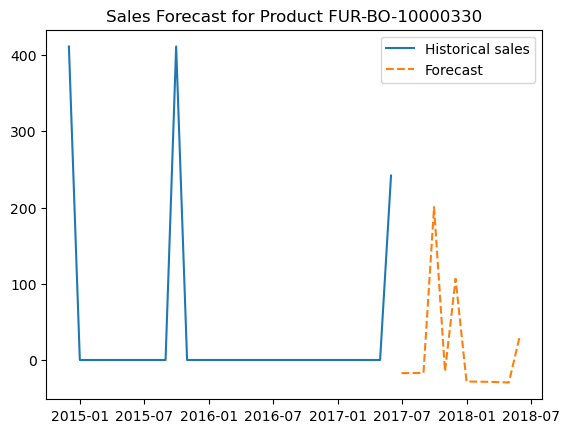

In [35]:
plt.plot(product_sales_monthly, label = 'Historical sales')
plt.plot(forecast, label = 'Forecast', linestyle = '--')
plt.title(f'Sales Forecast for Product FUR-BO-10000330')
plt.legend(loc = 'best')
plt.show()

### Safety Stock and reorder point calculation

In [36]:
#calculate average demand and standard deviation for a product

lead_time = data['Shipping Lead Time'].mean()
avg_demand = product_sales_monthly.mean()
std_demand = product_sales_monthly.std()

#safety stock = Z * Std dev of lead time demand(Z = 1.65 for 95 % service level)
service_level = 1.65
safety_stock = service_level * std_demand * np.sqrt(lead_time)

#recorder point = (average demand * lead time) + safety stock
reorder_point = (avg_demand * lead_time) + safety_stock

print(f'Safety stock for product {product_id}: {safety_stock}')
print(f'Reorder point for product {product_id}: {reorder_point}')

Safety stock for product FUR-BO-10000330: 357.9117046606137
Reorder point for product FUR-BO-10000330: 492.43279471247604


### ABC analysis

In [39]:
# Aggregate sales per product
product_sales = data.groupby('Product ID')['Sales'].sum().sort_values(ascending=False)

# Calculate cumulative percentage
product_sales_cumsum = product_sales.cumsum() / product_sales.sum()

# Define ABC classes
def abc_classification(cum_pct):
    if cum_pct <= 0.8:
        return 'A'
    elif cum_pct <= 0.95:
        return 'B'
    else:
        return 'C'

# Apply ABC classification
abc_class = product_sales_cumsum.apply(abc_classification)

# Add ABC class to original product sales data
abc_df = pd.DataFrame({'Sales': product_sales, 'Cumulative Percentage': product_sales_cumsum, 'ABC Class': abc_class})

print(abc_df.head())


                      Sales  Cumulative Percentage ABC Class
Product ID                                                  
FUR-CH-10002024  21870.5760               0.029475         A
FUR-BO-10004834  15610.9656               0.050514         A
FUR-TA-10003473  12995.2915               0.068028         A
FUR-CH-10001215  12975.3820               0.085515         A
FUR-BO-10002213  12921.6430               0.102930         A


In [40]:
# EOQ Formula: sqrt((2 * D * S) / H)
D = avg_demand  # Average demand rate
S = 100  # Ordering cost (you can adjust this value)
H = 50  # Holding cost per unit (you can adjust this value)

EOQ = np.sqrt((2 * D * S) / H)
print(f'Economic Order Quantity (EOQ) for Product {product_id}: {EOQ}')


Economic Order Quantity (EOQ) for Product FUR-BO-10000330: 11.720530649662473


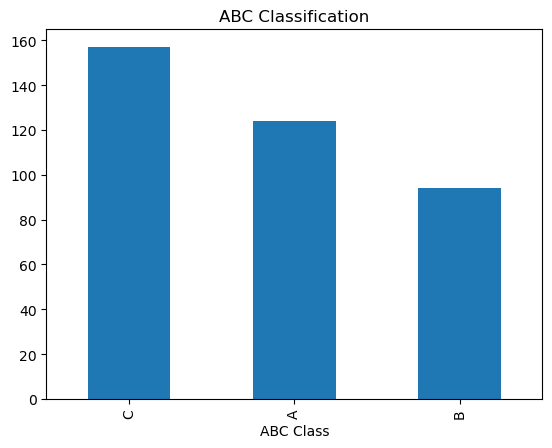

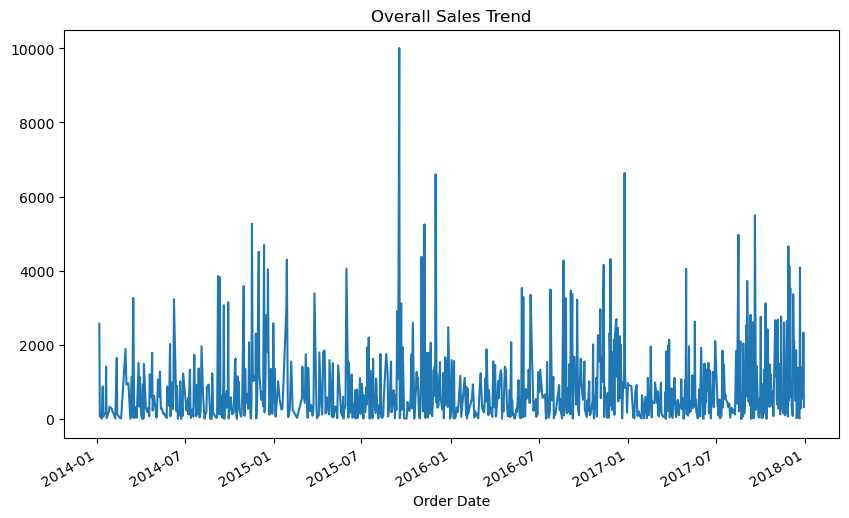

In [42]:
# Plotting ABC classification
abc_df['ABC Class'].value_counts().plot(kind='bar', title='ABC Classification')
plt.show()

# Plotting demand trend for a product
data.groupby('Order Date')['Sales'].sum().plot(title='Overall Sales Trend', figsize=(10, 6))
plt.show()


1. Safety Stock and Reorder Point
Safety Stock: You calculated the safety stock for the product as 357.91 units. This indicates that to maintain a 95% service level (based on the Z-score of 1.65), the company should keep at least 357 units of this product in reserve to avoid stockouts, accounting for demand variability and shipping lead time.
Reorder Point: The reorder point is 492.43 units, which means when the stock level reaches this point, it’s time to reorder the product. This ensures that while the new order is in transit (considering the lead time), you won’t run out of stock.
Conclusion: To minimize stockouts and maintain a smooth supply chain, FUR-BO-10000330 should be reordered when inventory falls to around 492 units, with a buffer of 358 units as safety stock.

2. Economic Order Quantity (EOQ)
EOQ: The Economic Order Quantity (EOQ) for this product is 11.72 units, which is the optimal order quantity that minimizes the total cost of ordering and holding inventory. Although the EOQ is relatively small, it suggests that the product is likely ordered frequently due to the combination of high holding costs or moderate demand.
Conclusion: The company should consider ordering approximately 12 units of FUR-BO-10000330 at a time to minimize costs associated with both holding inventory and placing orders. However, this small EOQ might need further adjustment based on practical considerations like order minimums, bulk ordering discounts, or supplier agreements.

3. ABC Analysis
Product Importance: In the ABC analysis, FUR-BO-10000330 is not listed in the top performers, which implies it might fall into the B or C category based on cumulative sales. This means it is not among the highest revenue-generating products for the company.
A Category products are typically the top 20% of products that contribute to 80% of total revenue. Products like FUR-CH-10002024 and FUR-BO-10004834 are classified as A-items, meaning they require the most focus in terms of inventory control and optimization.
Conclusion: FUR-BO-10000330 may require less stringent inventory control compared to A-class products, as it doesn't contribute significantly to total revenue. However, its reorder point and safety stock should still be monitored to avoid shortages.

Final Summary
FUR-BO-10000330 has a moderate safety stock and reorder point, which will help maintain product availability.
The EOQ suggests frequent, small orders, indicating that inventory costs need to be carefully balanced.
In the ABC analysis, it likely falls outside of the critical A category, meaning it’s not a top revenue driver, so inventory control can be more flexible compared to higher-priority items.